# **Image analysis**
**Overview of PNG image statistics and characteristics.**



---
imports...


In [21]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import PIL
from PIL import Image



---

read image file and show basic properties

In [22]:
# read image from current folder
image = None
try:
    image = Image.open('image.png').convert('RGB')
except:
    print('Image not found. Check name of file and make sure it is located in current folder.')

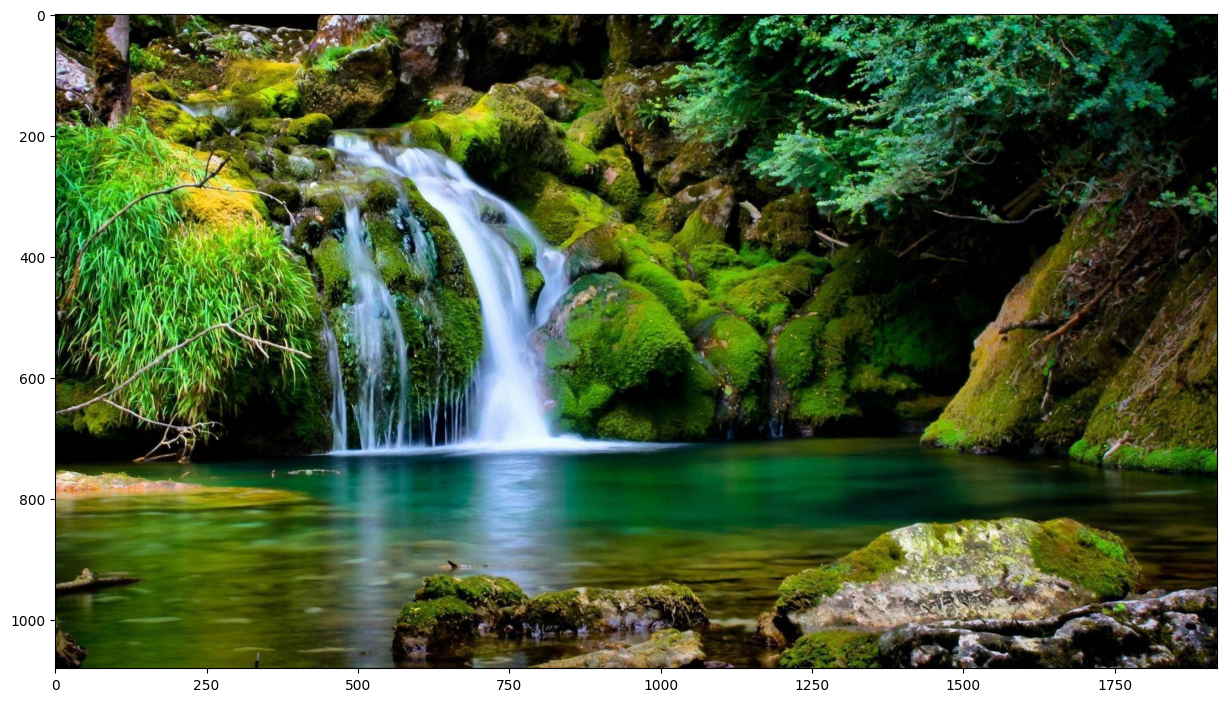

In [23]:
# image preview
plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.show()

In [24]:
# print base info
print('\nWidth: ', image.width)
print('Height: ', image.height)
print('Format: ', image.format)
print('Type: ', image.mode)


Width:  1920
Height:  1080
Format:  None
Type:  RGB


In [25]:
# make image representation with numpy array WIDTH x HEIGHT x 3 (RGB depth)
image_array = np.array(image)

In [26]:
# check RGB values
red = image_array[:, :, 0].mean().round()
green = image_array[:, :, 1].mean().round()
blue = image_array[:, :, 2].mean().round()
print('\nRed: ', red)
print('Green: ', green)
print('Blue: ', blue)


Red:  63.0
Green:  83.0
Blue:  44.0




---

RBG distribution

<ipython-input-27-a0ff44712baf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Channel', y='Value', data=data, palette=colors)


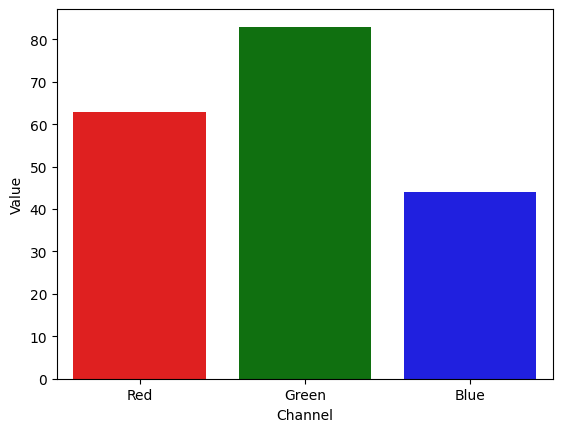

In [27]:
# red green blue average values
data = pd.DataFrame({
    'Channel': ['Red', 'Green', 'Blue'],
    'Value': [red, green, blue],
})

colors = ['red', 'green', 'blue']
sns.barplot(x='Channel', y='Value', data=data, palette=colors)
plt.show()

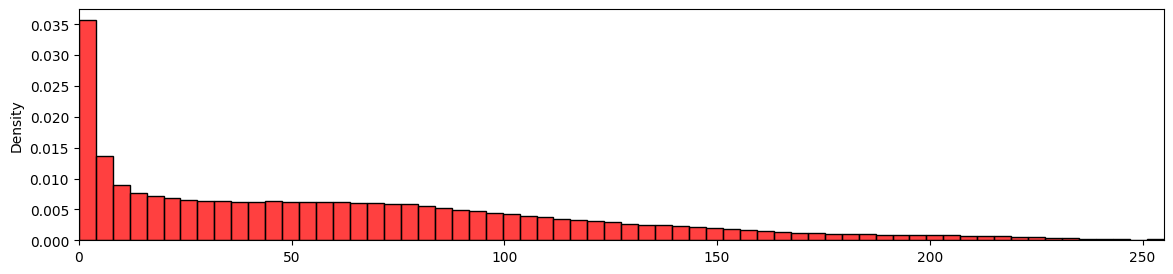

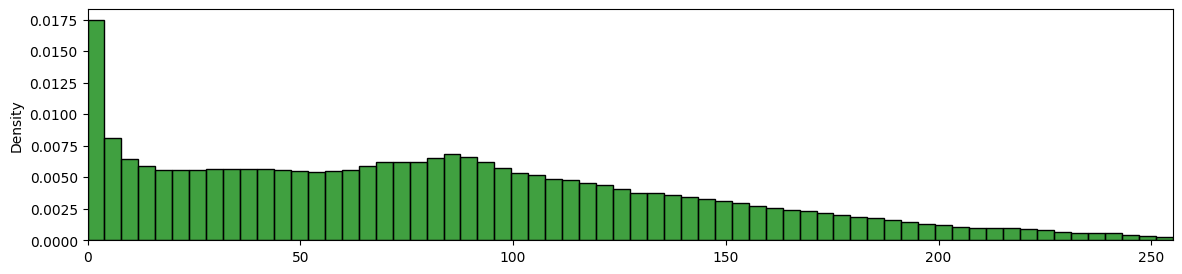

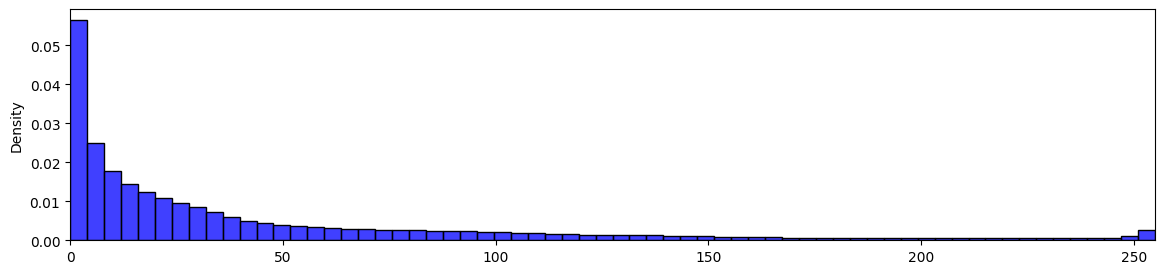

In [28]:
# RGB channels
red_channel = image_array[:, :, 0].flatten()
green_channel = image_array[:, :, 1].flatten()
blue_channel = image_array[:, :, 2].flatten()

# histogram charts
bins = 64
chart_width = 14
chart_height = 3
alpha = 0.75

plt.figure(figsize=(chart_width, chart_height))
sns.histplot(red_channel, color='red', stat='density', bins=bins, linewidth=1, alpha=alpha)
plt.xlim(0, 255)
plt.show()

plt.figure(figsize=(chart_width, chart_height))
sns.histplot(green_channel, color='green', stat='density', bins=bins, linewidth=1, alpha=alpha)
plt.xlim(0, 255)
plt.show()

plt.figure(figsize=(chart_width, chart_height))
sns.histplot(blue_channel, color='blue', stat='density', bins=bins, linewidth=1, alpha=alpha)
plt.xlim(0, 255)
plt.show()

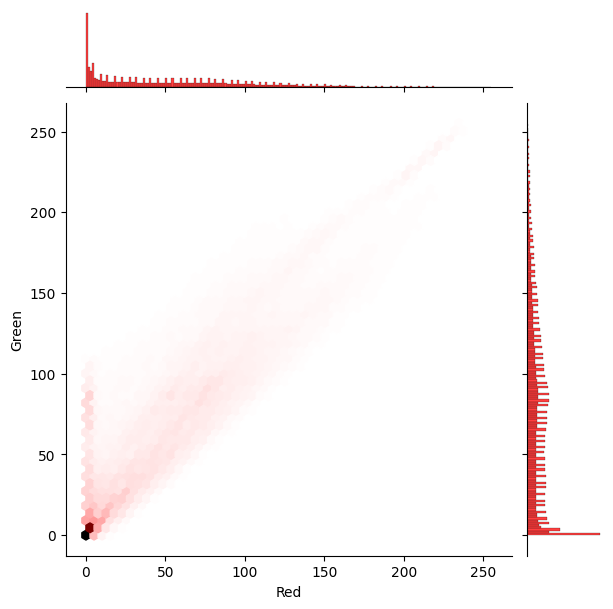

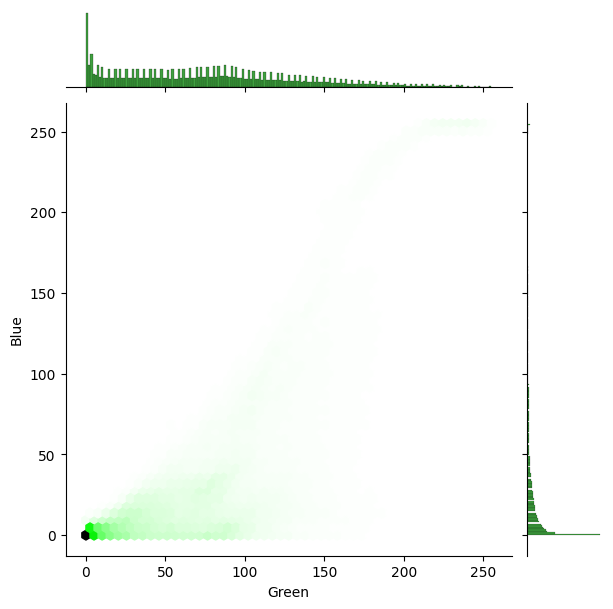

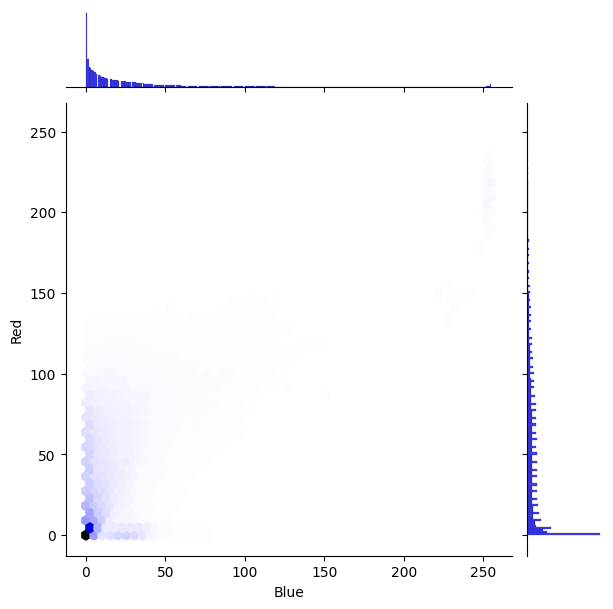

In [29]:
sns.jointplot(x=red_channel, y=green_channel, kind='hex', color='red')
plt.xlabel('Red')
plt.ylabel('Green')
plt.show()

sns.jointplot(x=green_channel, y=blue_channel, kind='hex', color='green')
plt.xlabel('Green')
plt.ylabel('Blue')
plt.show()

sns.jointplot(x=blue_channel, y=red_channel, kind='hex', color='blue')
plt.xlabel('Blue')
plt.ylabel('Red')
plt.show()



---

brightness distribution

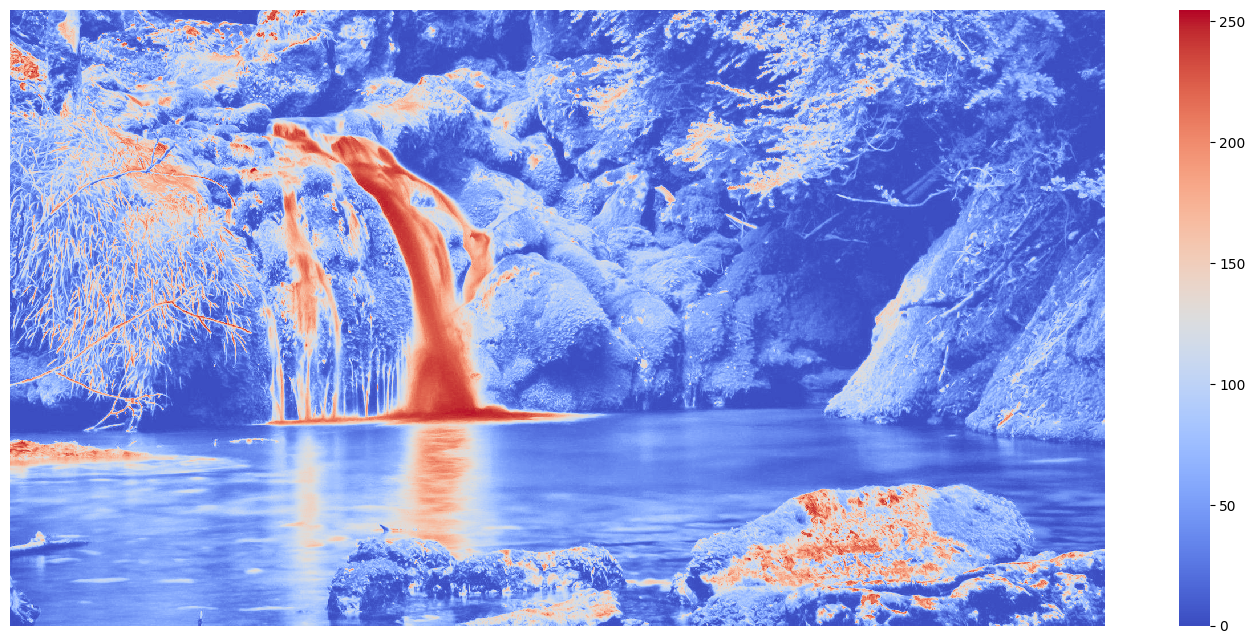

In [30]:
# brightness on image - heatmap
brightness = image_array.mean(axis=2).astype(np.float32).round(2)

plt.figure(figsize=(19, 8))
sns.heatmap(brightness, cmap='coolwarm', cbar=True, xticklabels=False, yticklabels=False)
plt.gca().set_aspect('equal')
plt.show()

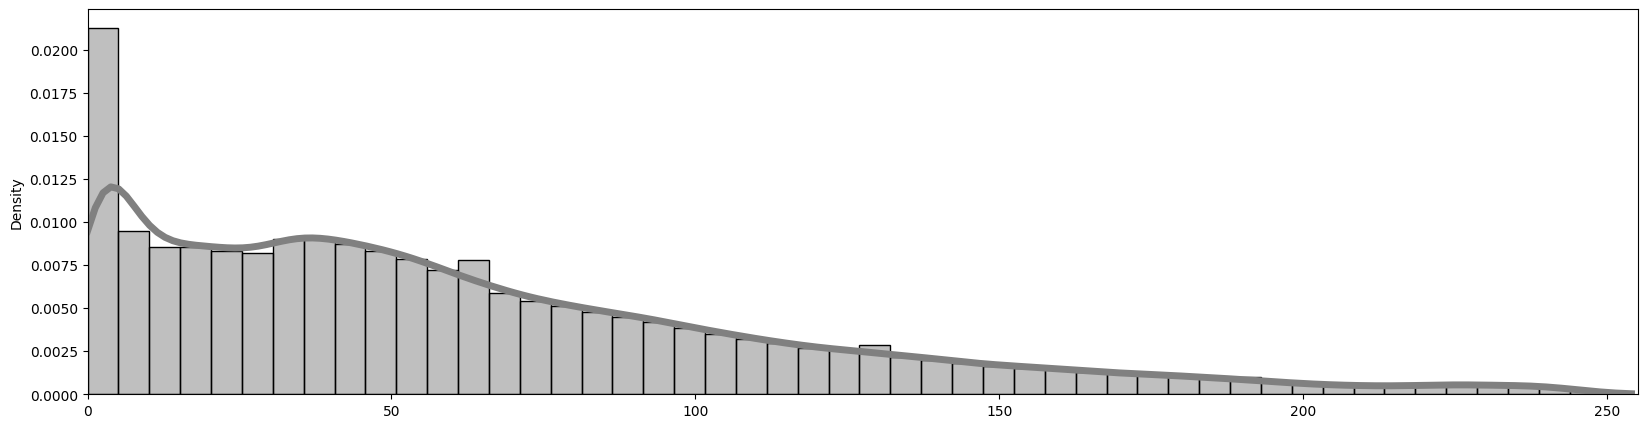

In [31]:
# brightness on image - histogram
brightness = image_array.mean(axis=2).astype(np.uint8).flatten()

plt.figure(figsize=(20, 5))
sns.histplot(brightness.flatten(), stat='density', bins=50, color='gray', kde=True, kde_kws={'bw_adjust': 1.5}, line_kws={'linewidth': 5, 'color': 'red'})
plt.xlim(0, 255)
plt.show()



---

saturation distribution

In [32]:
# convert image to hsv
image_hsv = image.convert('HSV')
hua = image_hsv.split()[0]
saturation = image_hsv.split()[1]
value = image_hsv.split()[2]

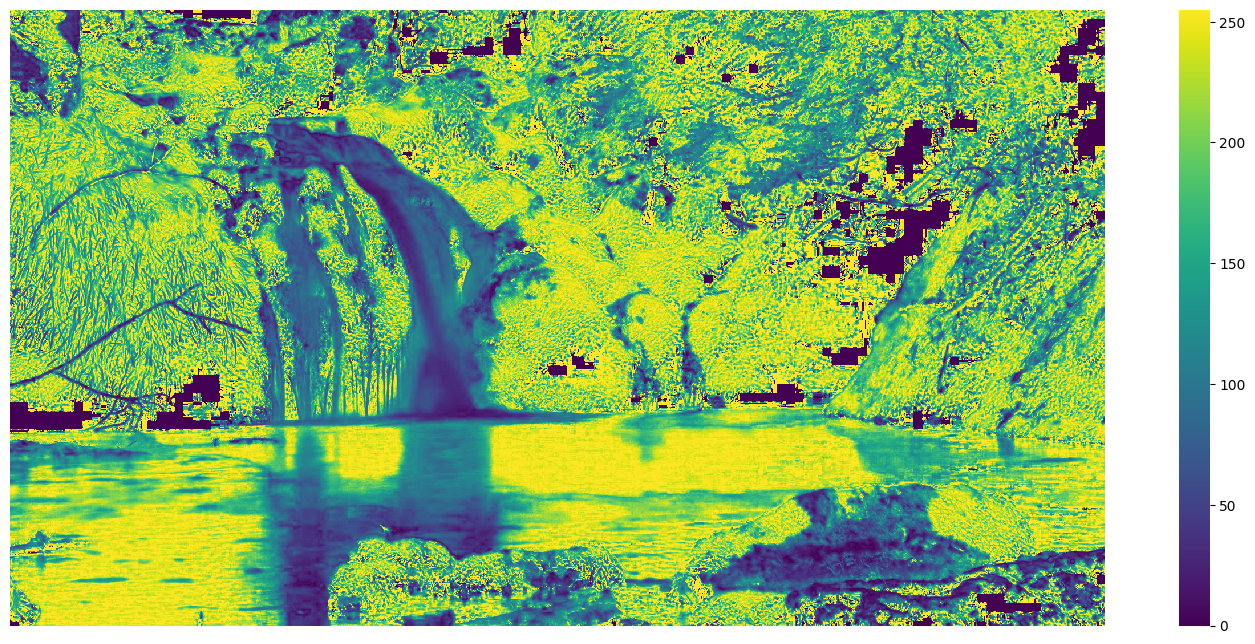

In [33]:
# saturation distribution - heatmap
plt.figure(figsize=(19, 8))
sns.heatmap(saturation, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.gca().set_aspect('equal')
plt.show()

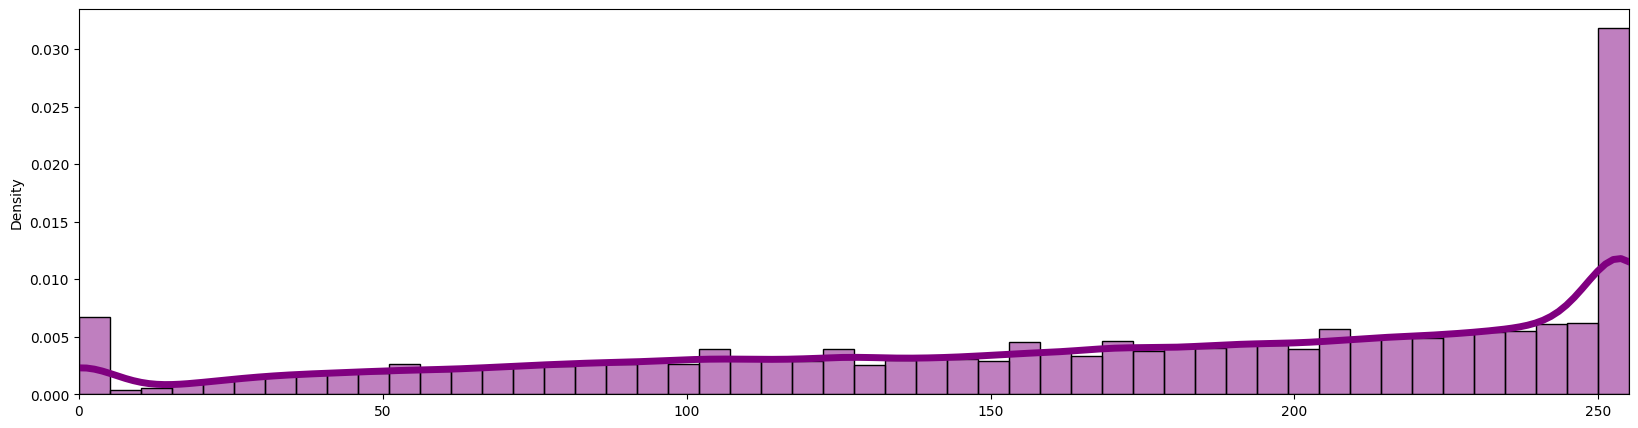

In [34]:
plt.figure(figsize=(20, 5))
sns.histplot(np.array(saturation).flatten(), stat='density', bins=50, color='purple', kde=True, kde_kws={'bw_adjust': 1.5}, line_kws={'linewidth': 5, 'color': 'red'})
plt.xlim(0, 255)
plt.show()